In [2]:
# Simple Python demo: BMI calculator
height = 1.75  # meters
weight = 68    # kilograms

In [44]:
bmi = weight / (height ** 2)
print("Your BMI is:", bmi)

Your BMI is: 22.20408163265306


In [6]:
print(f"Your BMI is: {bmi:.2f}") # this is called an f-string, a clean way to embed variables 
# or expressions directly inside a string.


Your BMI is: 22.20


In [13]:
if bmi < 18.5:
    print("Underweight")
elif bmi < 25:
    print("Normal weight")
else:
    print("Overweight")

# Indentation is syntax in Python. The indented lines belong to the block after the :. 
# Use 4 spaces per level (don’t mix tabs/spaces).

Normal weight


In [6]:
age = 43

# calculate total body water using Watson formula
TBW = 2.447 - (0.09145 * age) + (0.1074 * 100 * height)+ (0.3362 * weight)
TBW
print(f"Your total body water in liters is: {TBW: .1f}")

Your total body water in liters is:  40.2


In [14]:
# comparisons using > or < receive a T/F response
5>2

True

In [15]:
print(f"Your BMI is: {bmi:.1f}") # rounding is for presentation, the underlying values don't change



Your BMI is: 22.2


In [16]:
def categorize_bmi(height_m, weight_kg):
    bmi = weight_kg / (height_m ** 2)
    if bmi < 18.5:
        category = "Underweight"
    elif bmi < 25:
        category = "Normal weight"
    else:
        category = "Overweight"
    return bmi, category

bmi, cat = categorize_bmi(1.75, 68)
print(f"BMI: {bmi:.1f} → {cat}")


BMI: 22.2 → Normal weight


In [17]:
# getting user input
h = float(input("Height (m): "))
w = float(input("Weight (kg): "))
bmi = w / (h ** 2)
print(f"Your BMI is: {bmi:.1f}")


Height (m):  1.78
Weight (kg):  77.11


Your BMI is: 24.3


Want to do one more small step before touching ML? I suggest we read a tiny CSV with `pandas` and compute a column (e.g., BMI for each row). Then we’ll implement **linear regression from scratch** using just `numpy`, which is the perfect bridge into machine learning.

In [21]:
# Create a tuple
patient = ("John", 45, "CVID")

# Access items by index (zero-based)
print(patient[0])   # John
print(patient[1])   # 45
print(patient[2])   # CVID

# Tuples cannot be changed
# patient[1] = 46  # ❌ Error


John
45
CVID


In [7]:
# Create a list
ages = [12, 15, 18, 21]

# Access by index
print(ages[0])   # 12

# Modify
ages[2] = 19
print(ages)      # [12, 15, 19, 21]

# Add or remove
ages.append(25)
ages.remove(15)
print(ages)      # [12, 19, 21, 25]


12
[12, 15, 19, 21]
[12, 19, 21, 25]


In [11]:
# Create a dictionary
patient_info = {"name": "John", "age": 45, "diagnosis": "CVID"}

# Access by key
print(patient_info["name"])  # John

# Add or modify
patient_info["age"] = 43
patient_info["city"] = "Toledo"

# Loop through keys and values
for key, value in patient_info.items():
    print(key, "→", value)


John
name → John
age → 43
diagnosis → CVID
city → Toledo


In [12]:
print(patient_info.items())


dict_items([('name', 'John'), ('age', 43), ('diagnosis', 'CVID'), ('city', 'Toledo')])


In [25]:
# loop through a list
ages = [12, 15, 18]
for a in ages:
    print(a)

#Loop through a tuple:

coords = (10, 20)
for c in coords:
    print(c)

# Loop through dictionary keys only:

for k in patient_info:
    print(k)   # default is looping through keys

# Or values only:
for v in patient_info.values():
    print(v)

12
15
18
10
20
name
age
diagnosis
city
John
46
CVID
Cleveland


In [13]:
# example: looping through a list of patient dictionaries

# Our "dataset"
patients = [
    {"name": "John", "height_m": 1.75, "weight_kg": 68},
    {"name": "Maria", "height_m": 1.62, "weight_kg": 70},
    {"name": "Akira", "height_m": 1.80, "weight_kg": 90}
]

# Loop through each patient
for person in patients:
    bmi = person["weight_kg"] / (person["height_m"] ** 2)
    print(f"{person['name']}: BMI = {bmi:.1f}")

# add a new key (bmi) for each patient
for person in patients:
    bmi = person["weight_kg"] / (person["height_m"] ** 2)
    person["bmi"] = round(bmi,1)   # <-- this is the key step

print(patients)


John: BMI = 22.2
Maria: BMI = 26.7
Akira: BMI = 27.8
[{'name': 'John', 'height_m': 1.75, 'weight_kg': 68, 'bmi': 22.2}, {'name': 'Maria', 'height_m': 1.62, 'weight_kg': 70, 'bmi': 26.7}, {'name': 'Akira', 'height_m': 1.8, 'weight_kg': 90, 'bmi': 27.8}]


Using Pandas instead

In [1]:
import pandas as pd

data = [
    {"name": "John", "height_m": 1.75, "weight_kg": 68},
    {"name": "Maria", "height_m": 1.62, "weight_kg": 70},
    {"name": "Akira", "height_m": 1.80, "weight_kg": 90}
]

df = pd.DataFrame(data)
print(df)


    name  height_m  weight_kg
0   John      1.75         68
1  Maria      1.62         70
2  Akira      1.80         90


In [31]:
data = {
    "name": ["John", "Maria", "Akira"],
    "height_m": [1.75, 1.62, 1.80],
    "weight_kg": [68, 70, 90]
}

df = pd.DataFrame(data)
print(df)


    name  height_m  weight_kg
0   John      1.75         68
1  Maria      1.62         70
2  Akira      1.80         90


In [32]:
print(df["height_m"])


0    1.75
1    1.62
2    1.80
Name: height_m, dtype: float64


In [2]:
df["bmi"] = df["weight_kg"] / (df["height_m"] ** 2)
df["bmi"] = df["bmi"].round(1)
print(df)



    name  height_m  weight_kg   bmi
0   John      1.75         68  22.2
1  Maria      1.62         70  26.7
2  Akira      1.80         90  27.8


In [3]:
print(df["bmi"])

0    22.2
1    26.7
2    27.8
Name: bmi, dtype: float64


In [4]:
print(df)

    name  height_m  weight_kg   bmi
0   John      1.75         68  22.2
1  Maria      1.62         70  26.7
2  Akira      1.80         90  27.8


In [5]:
print(df.describe())


       height_m  weight_kg        bmi
count  3.000000   3.000000   3.000000
mean   1.723333  76.000000  25.566667
std    0.092916  12.165525   2.967041
min    1.620000  68.000000  22.200000
25%    1.685000  69.000000  24.450000
50%    1.750000  70.000000  26.700000
75%    1.775000  80.000000  27.250000
max    1.800000  90.000000  27.800000


Would you like to see how to visualize this DataFrame (e.g., plot height vs weight) before we code linear regression?

Slope: 113.54
Intercept: -130.50


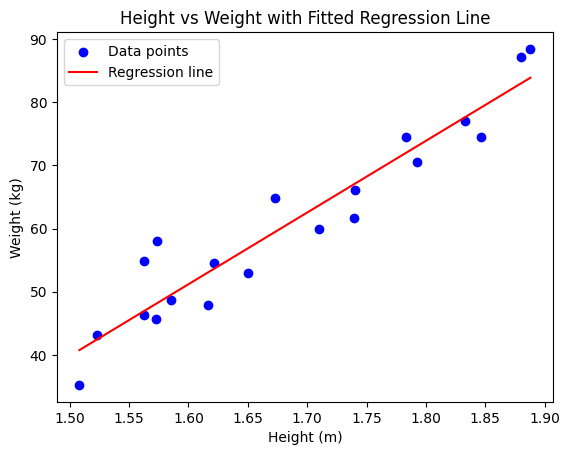

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------
# 1. Generate synthetic dataset
# ---------------------------
np.random.seed(42)

# heights between 1.50 and 1.90 meters
heights = np.random.uniform(1.50, 1.90, 20)

# weights with linear trend + noise
weights = 120 * heights - 140 + np.random.normal(0, 5, 20)

names = [f"Person_{i+1}" for i in range(20)]

df = pd.DataFrame({
    "name": names,
    "height_m": heights,
    "weight_kg": weights
})

# ---------------------------
# 2. Fit linear regression model
# ---------------------------
X = df[["height_m"]]       # 2D array for sklearn
y = df["weight_kg"]        # 1D array

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# ---------------------------
# 3. Create fitted line for plotting
# ---------------------------
x_line = np.linspace(df["height_m"].min(), df["height_m"].max(), 100)
y_line = intercept + slope * x_line

# ---------------------------
# 4. Plot scatter and regression line
# ---------------------------
plt.scatter(df["height_m"], df["weight_kg"], color="blue", label="Data points")
plt.plot(x_line, y_line, color="red", label="Regression line")

plt.title("Height vs Weight with Fitted Regression Line")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.show()


SIMPLE ML EXAMPLE IN PYTHON
Predicting house prices from square footage

This example uses only:

pandas

scikit-learn

matplotlib

and contains just 3 steps:
prepare data → train model → make prediction


In [17]:
import pandas as pd

# Simple dataset
data = {
    "sqft": [800, 1000, 1200, 1500, 1800],    # square footage
    "price": [150000, 180000, 210000, 260000, 300000]
}

df = pd.DataFrame(data)
df


,sqft,price
0,800,150000
1,1000,180000
2,1200,210000
3,1500,260000
4,1800,300000


fit a linear regression model

In [18]:
from sklearn.linear_model import LinearRegression

# Features (must be 2D)
X = df[["sqft"]]

# Target (1D)
y = df["price"]

model = LinearRegression()
model.fit(X, y)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)


Slope: 151.89873417721518
Intercept: 28607.59493670889


predict price of 1300 square unit house

In [19]:
model.predict([[1300]])


/Users/johnmcdonnell/.pyenv/versions/py314/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([226075.94936709])

In [20]:
model.predict(pd.DataFrame({"sqft": [1300]}))


array([226075.94936709])

/Users/johnmcdonnell/.pyenv/versions/py314/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


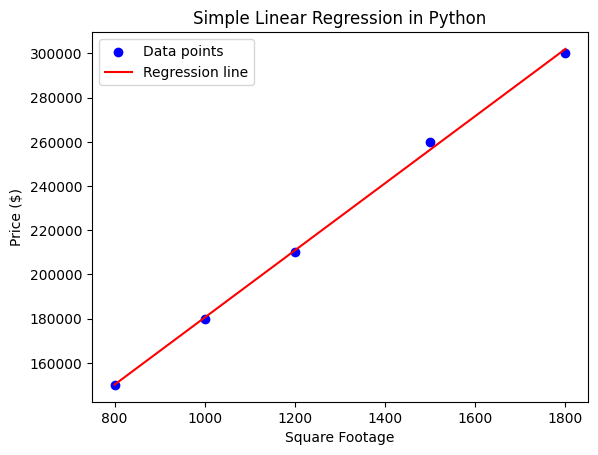

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df["sqft"], df["price"], color="blue", label="Data points")

# Draw line
x_line = np.linspace(df["sqft"].min(), df["sqft"].max(), 100)
y_line = model.predict(x_line.reshape(-1, 1))

plt.plot(x_line, y_line, color="red", label="Regression line")

plt.xlabel("Square Footage")
plt.ylabel("Price ($)")
plt.title("Simple Linear Regression in Python")
plt.legend()
plt.show()
